In [1]:
#For data processing
import pandas as pd
import numpy as np

#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv("../input/titanic/train.csv")
tf1 = pd.read_csv("../input/titanic/test.csv")
result = pd.read_csv("../input/titanic/gender_submission.csv")

In [3]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tf1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df = df1.copy()
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
tf = tf1.copy()
tf1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.shape

(891, 12)

In [8]:
tf.shape

(418, 11)

In [9]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
tf.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
tf.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

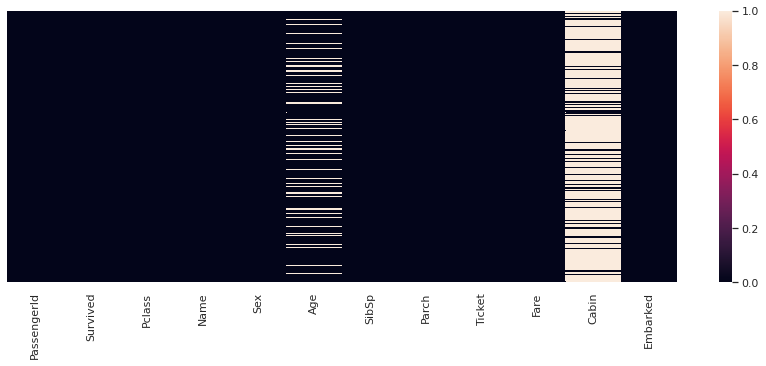

In [13]:
sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(df.isnull(),yticklabels=False)

Heatmap for missing values.

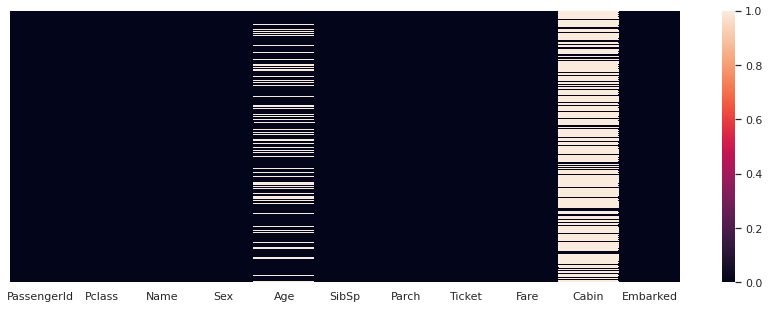

In [14]:
sns.heatmap(tf.isnull(),yticklabels=False)

Heatmap for missing values.

In [15]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Concatenating the Training and Testing dataset for feature reengineering.

In [16]:
final = pd.concat([df,tf],axis = 0)
final.drop(['Survived'],axis = 1,inplace = True)

In [17]:
final.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
final.shape

(1309, 11)

<h3>1.) Categorical values --> PassengerId, Survived, Name, Sex, Ticket, Cabin, Embarked </h3>
<h3>2.) Ordinal values --> Pclass </h3>
<h3>3.) Numerical values --> Age, SibSp, Parch, Fare </h3>

<h1>Feature Reengineering </h1>

<h2>Numerical Variables</h2>

<h3> Age ---> </h3>

In [19]:
index_NaN_age = list(final["Age"][final["Age"].isnull()].index)

for i in index_NaN_age :
    age_med = final["Age"].median()
    age_pred = final["Age"][((final['SibSp'] == final.iloc[i]["SibSp"]) & (final['Parch'] == final.iloc[i]["Parch"]) & (final['Pclass'] == final.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        final['Age'].iloc[i] = age_pred
    else :
        final['Age'].iloc[i] = age_med

In [20]:
final['Age'].isnull().sum()

86

As the Age shows 86 missing values even after imputing. The missing values are present in testing dataset, so I am gonna substitute the rest of the values with median.

In [21]:
final['Age'].fillna(final['Age'].median(),inplace = True)


<h3> Fare ---> </h3>

In [22]:
final['Fare'].isnull().sum()

1

In [23]:
final["Fare"] = final["Fare"].fillna(final["Fare"].median())


In [24]:
final['Fare'].dtypes

dtype('float64')

In [25]:
final["Fare"] = final["Fare"].map(lambda n: np.log(n) if n > 0 else 0)


<h2> Categorical Variables </h2>

<h3> Name ---> </h3>

In [26]:
new = final['Name'].str.split('.', n=1, expand = True)
final['First'] = new[0]
final['Last'] = new[1]
new1 = final['First'].str.split(',', n=1, expand = True)
final['Last Name'] = new1[0]
final['Title'] = new1[1]
new2 = final['Title'].str.split('', n=1, expand = True)

In [27]:
final['Title'].value_counts()

 Mr              757
 Miss            260
 Mrs             197
 Master           61
 Rev               8
 Dr                8
 Col               4
 Major             2
 Mlle              2
 Ms                2
 Mme               1
 the Countess      1
 Don               1
 Jonkheer          1
 Lady              1
 Capt              1
 Dona              1
 Sir               1
Name: Title, dtype: int64

In [28]:
final.drop(['First','Last','Name','Last Name'],axis = 1,inplace = True)

In [29]:
final.replace(to_replace = [ ' Don', ' Rev', ' Dr', ' Mme',
        ' Major', ' Sir', ' Col', ' Capt',' Jonkheer'], value = ' Honorary(M)', inplace = True)
final.replace(to_replace = [ ' Ms', ' Lady', ' Mlle',' the Countess', ' Dona'], value = ' Honorary(F)', inplace = True)

In [30]:
df3 = final.copy()
df3 =  df3[:891]
df3 = pd.concat([df3,df1['Survived']],axis = 1)
df3.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Survived
0,1,3,male,22.0,1,0,A/5 21171,1.981001,NaN,S,Mr,0
1,2,1,female,38.0,1,0,PC 17599,4.266662,C85,C,Mrs,1
2,3,3,female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,Miss,1
3,4,1,female,35.0,1,0,113803,3.972177,C123,S,Mrs,1
4,5,3,male,35.0,0,0,373450,2.085672,NaN,S,Mr,0


In [31]:
final['Title'].value_counts()

 Mr             757
 Miss           260
 Mrs            197
 Master          61
 Honorary(M)     27
 Honorary(F)      7
Name: Title, dtype: int64

In [32]:
final = pd.get_dummies(final, columns = ["Title"])

In [33]:
final.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_ Honorary(F),Title_ Honorary(M),Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs
0,1,3,male,22.0,1,0,A/5 21171,1.981001,NaN,S,0,0,0,0,1,0
1,2,1,female,38.0,1,0,PC 17599,4.266662,C85,C,0,0,0,0,0,1
2,3,3,female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,0,0,0,1,0,0
3,4,1,female,35.0,1,0,113803,3.972177,C123,S,0,0,0,0,0,1
4,5,3,male,35.0,0,0,373450,2.085672,NaN,S,0,0,0,0,1,0


<h3> SibSp + Parch = Family Size ---> </h3>


In [34]:
final["Family"] = final["SibSp"] + final["Parch"] + 1

In [35]:
final['Single'] = final['Family'].map(lambda s: 1 if s == 1 else 0)
final['SmallF'] = final['Family'].map(lambda s: 1 if  s == 2  else 0)
final['MedF'] = final['Family'].map(lambda s: 1 if 3 <= s <= 4 else 0)
final['LargeF'] = final['Family'].map(lambda s: 1 if s >= 5 else 0)

<h3> Embarked ---></h3>

In [36]:
final['Embarked'].fillna("S",inplace = True)

In [37]:
final = pd.get_dummies(final, columns = ["Embarked"], prefix="Embarked_from_")

<h3>Cabin ---></h3>


In [38]:
final.Cabin.isnull().sum()

1014

In [39]:
final.Cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C78                4
B96 B98            4
                  ..
C103               1
B38                1
E40                1
D38                1
B80                1
Name: Cabin, Length: 186, dtype: int64

In [40]:
final['Cabin_final'] = df['Cabin'].str[0]

In [41]:
final['Cabin_final'].fillna('Unknown',inplace = True)

In [42]:
final['Cabin_final'].value_counts()

Unknown    1013
C            91
B            63
D            47
E            43
F            21
A            21
G             8
T             2
Name: Cabin_final, dtype: int64

In [43]:
final.drop(['Cabin'],axis = 1,inplace = True)

In [44]:
final = pd.get_dummies(final, columns = ["Cabin_final"],prefix="Cabin_")

In [45]:
final.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_ Honorary(F),Title_ Honorary(M),...,Embarked_from__S,Cabin__A,Cabin__B,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T,Cabin__Unknown
0,1,3,male,22.0,1,0,A/5 21171,1.981001,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,PC 17599,4.266662,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,3,female,26.0,0,0,STON/O2. 3101282,2.070022,0,0,...,1,0,0,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,113803,3.972177,0,0,...,1,0,0,1,0,0,0,0,0,0
4,5,3,male,35.0,0,0,373450,2.085672,0,0,...,1,0,0,0,0,0,0,0,0,1


<h3> Ticket ---></h3>

In [46]:
final.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [47]:
final.Ticket.value_counts()

CA. 2343     11
CA 2144       8
1601          8
3101295       7
PC 17608      7
             ..
237671        1
347090        1
233478        1
11755         1
A/4 45380     1
Name: Ticket, Length: 929, dtype: int64

In [48]:
final['Ticket'] = final['Ticket'].astype(str)
final['Ticket_length'] = final.Ticket.apply(len)
final['Ticket_length'].astype(int)
final['Ticket_length'].unique()

array([ 9,  8, 16,  6,  5,  7,  4, 10, 13, 15, 12, 11, 17, 18,  3])

In [49]:
final['Ticket_length'] = np.where(((final.Ticket_length == 3) | (final.Ticket_length == 4) | (final.Ticket_length == 5)),4,final.Ticket_length)

final['Ticket_length'] = np.where(((final.Ticket_length == 6)),5,final.Ticket_length)

final['Ticket_length'] = np.where(((final.Ticket_length == 7) | (final.Ticket_length == 8) | (final.Ticket_length == 9) | (final.Ticket_length == 10) | (final.Ticket_length == 13)
                                 | (final.Ticket_length == 17)| (final.Ticket_length == 16)| (final.Ticket_length == 13)| (final.Ticket_length == 12) | (final.Ticket_length == 15)
                                 | (final.Ticket_length == 11)| (final.Ticket_length == 18)),12,final.Ticket_length)


In [50]:
final['Ticket_length'].value_counts()

5     602
12    362
4     345
Name: Ticket_length, dtype: int64

In [51]:
final['Ticket_length'] = final['Ticket_length'].astype(str)

final['Ticket_length'] = np.where(((final.Ticket_length == '4')),'Below 6',final.Ticket_length)
final['Ticket_length'] = np.where(((final.Ticket_length == '5')),'At 6',final.Ticket_length)
final['Ticket_length'] = np.where(((final.Ticket_length == '12')),'Above 6',final.Ticket_length)


In [52]:
conversion = pd.get_dummies(final.Ticket_length, prefix = 'Ticket Length')
final = pd.concat([final , conversion], axis = 1)
 
final.drop(['Ticket','Ticket_length'],axis = 1, inplace = True)

In [53]:
final.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title_ Honorary(F),Title_ Honorary(M),Title_ Master,...,Cabin__C,Cabin__D,Cabin__E,Cabin__F,Cabin__G,Cabin__T,Cabin__Unknown,Ticket Length_Above 6,Ticket Length_At 6,Ticket Length_Below 6
0,1,3,male,22.0,1,0,1.981001,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,2,1,female,38.0,1,0,4.266662,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,3,female,26.0,0,0,2.070022,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,4,1,female,35.0,1,0,3.972177,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,5,3,male,35.0,0,0,2.085672,0,0,0,...,0,0,0,0,0,0,1,0,1,0


<h3> Sex ---> </h3>

In [54]:
final = pd.get_dummies(final, columns = ["Sex"],prefix="Gender_")

In [55]:
final.head()
final.drop(['PassengerId'],axis = 1,inplace = True)
final.drop(['SibSp','Parch','Family'],axis = 1,inplace = True)

In [56]:
final.dtypes

Pclass                     int64
Age                      float64
Fare                     float64
Title_ Honorary(F)         uint8
Title_ Honorary(M)         uint8
Title_ Master              uint8
Title_ Miss                uint8
Title_ Mr                  uint8
Title_ Mrs                 uint8
Single                     int64
SmallF                     int64
MedF                       int64
LargeF                     int64
Embarked_from__C           uint8
Embarked_from__Q           uint8
Embarked_from__S           uint8
Cabin__A                   uint8
Cabin__B                   uint8
Cabin__C                   uint8
Cabin__D                   uint8
Cabin__E                   uint8
Cabin__F                   uint8
Cabin__G                   uint8
Cabin__T                   uint8
Cabin__Unknown             uint8
Ticket Length_Above 6      uint8
Ticket Length_At 6         uint8
Ticket Length_Below 6      uint8
Gender__female             uint8
Gender__male               uint8
dtype: obj

In [57]:
final.isnull().sum()

Pclass                   0
Age                      0
Fare                     0
Title_ Honorary(F)       0
Title_ Honorary(M)       0
Title_ Master            0
Title_ Miss              0
Title_ Mr                0
Title_ Mrs               0
Single                   0
SmallF                   0
MedF                     0
LargeF                   0
Embarked_from__C         0
Embarked_from__Q         0
Embarked_from__S         0
Cabin__A                 0
Cabin__B                 0
Cabin__C                 0
Cabin__D                 0
Cabin__E                 0
Cabin__F                 0
Cabin__G                 0
Cabin__T                 0
Cabin__Unknown           0
Ticket Length_Above 6    0
Ticket Length_At 6       0
Ticket Length_Below 6    0
Gender__female           0
Gender__male             0
dtype: int64

# Visualizations

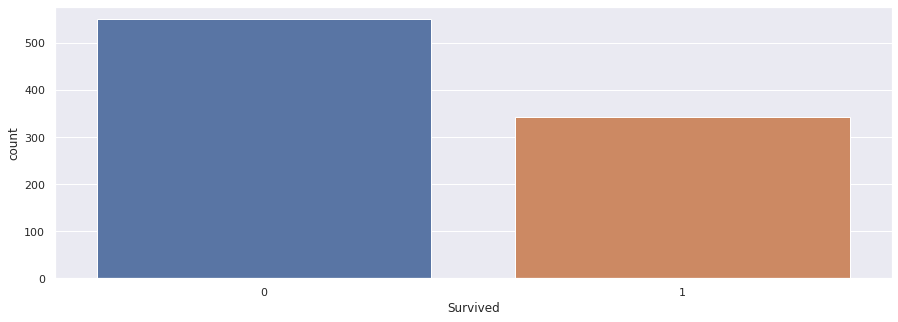

In [58]:
sns.countplot(x = 'Survived', data = df1)

Shows the count of survived people. Less number of people survived as compared to people who didn't survive.

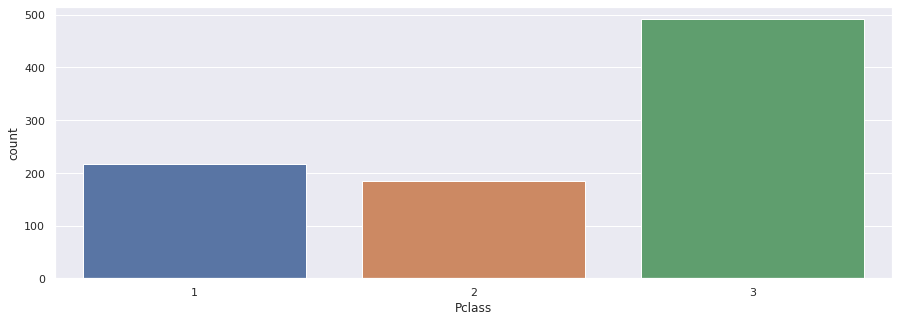

In [59]:
sns.countplot(x = 'Pclass', data = df1)

The order of passengers are highest for 3rd class, then 1st class and then came 2nd class at the lowest.

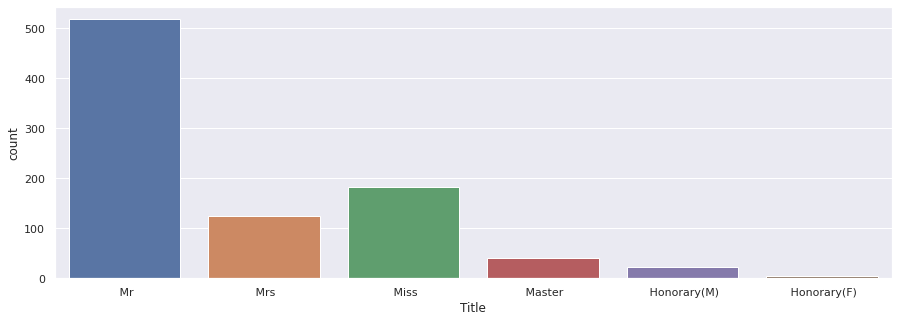

In [60]:
sns.countplot(x = 'Title', data = df3)

More number of Males are present, then comes Females according to titles. The honorary title means special titles given to people from army and so on.

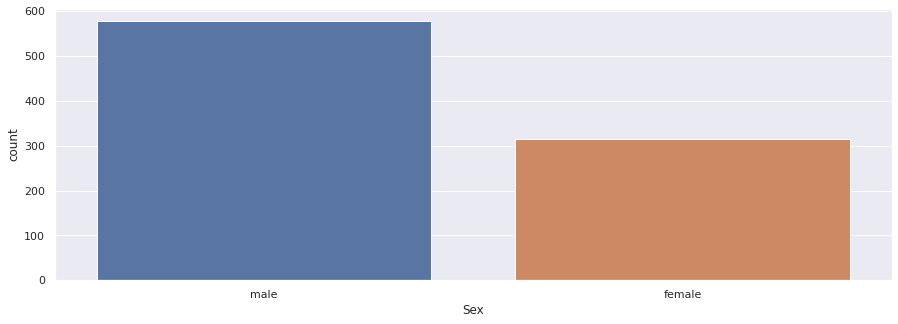

In [61]:
sns.countplot(x = 'Sex', data = df1)

Count of males and females aboard the titanic.

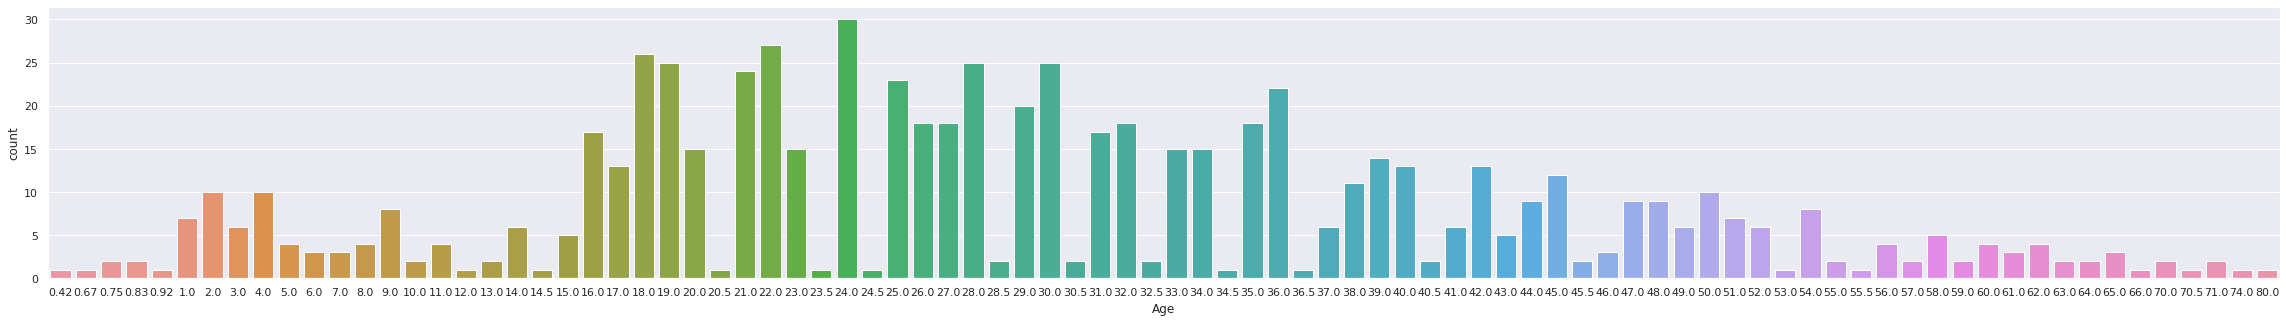

In [62]:
sns.set(rc={'figure.figsize':(40,5)})
sns.countplot(x = 'Age', data = df1)

The distribution of age among the passengers and their count for particular number of age.

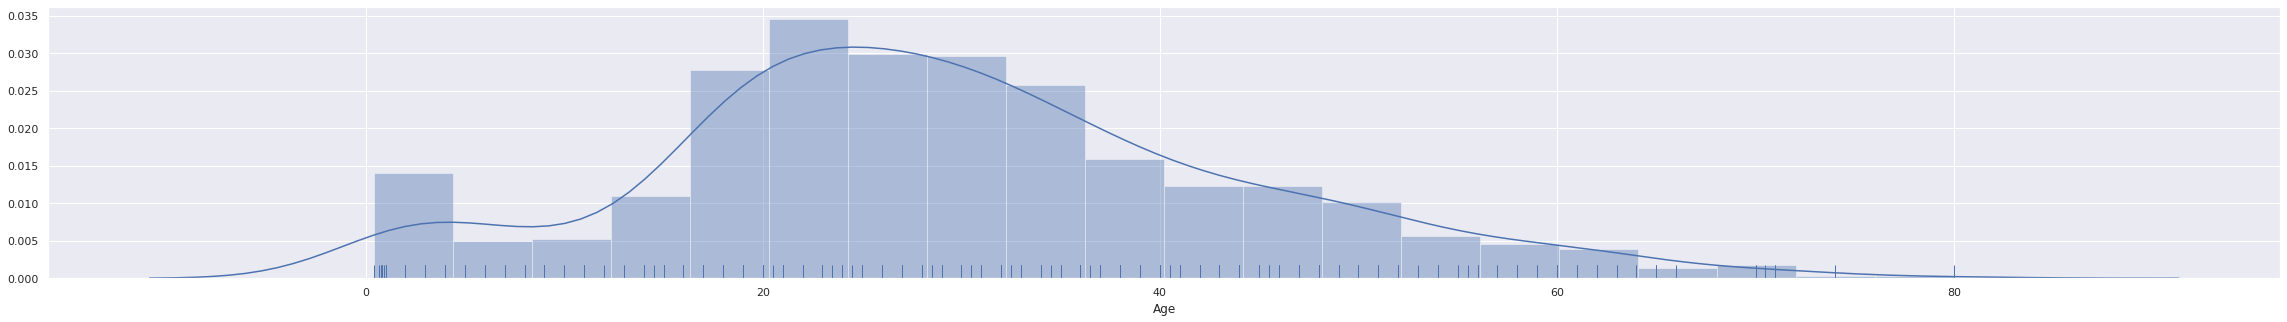

In [63]:
x = df1['Age']
sns.distplot(x, hist=True, rug=True)

As you can see, age has more number of people present in the middle part(20-40) and their populatin is more even distribted in the middle and shows less towards for older ages.

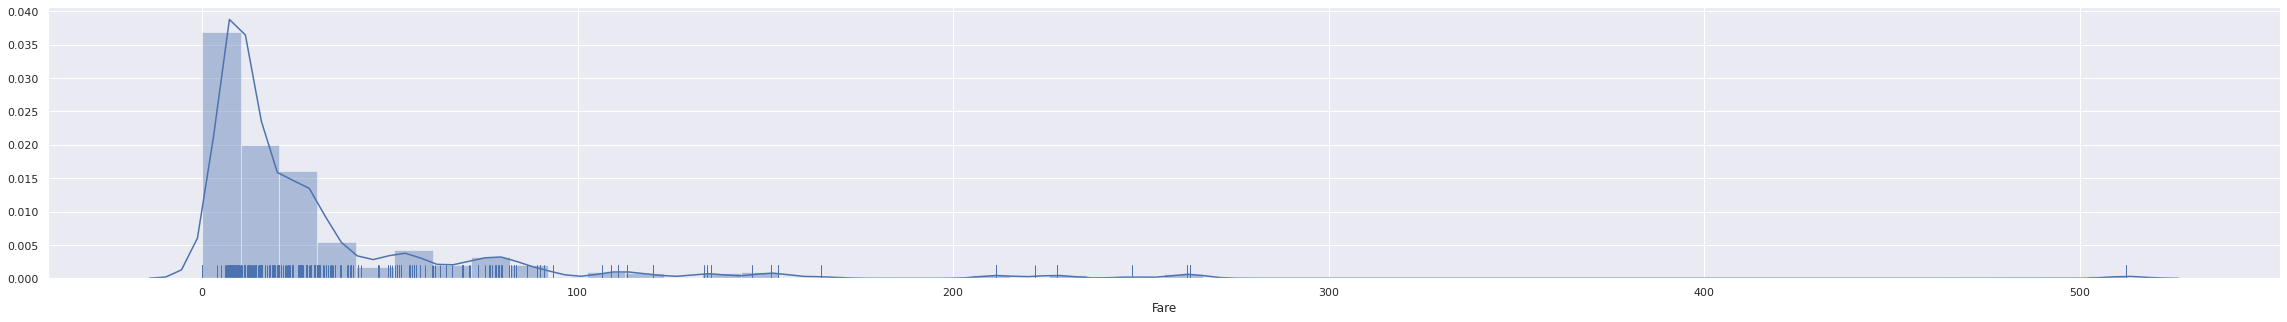

In [64]:
x = df1['Fare']
sns.distplot(x, hist=True, rug=True)

This shows that fare is very unevenly distributed(Skewness is high) with the maximum value present in the first quantile (0-100). Therefore, I split them into groups.

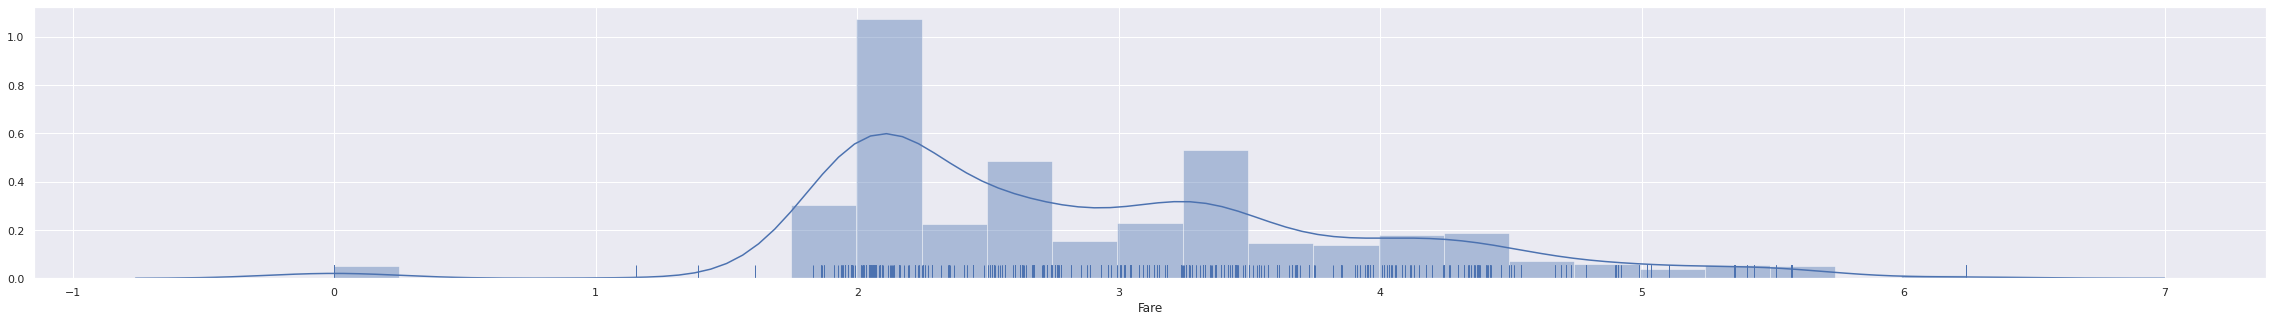

In [65]:
x = final['Fare']
sns.distplot(x, hist=True, rug=True)

Data still evenly distributed.

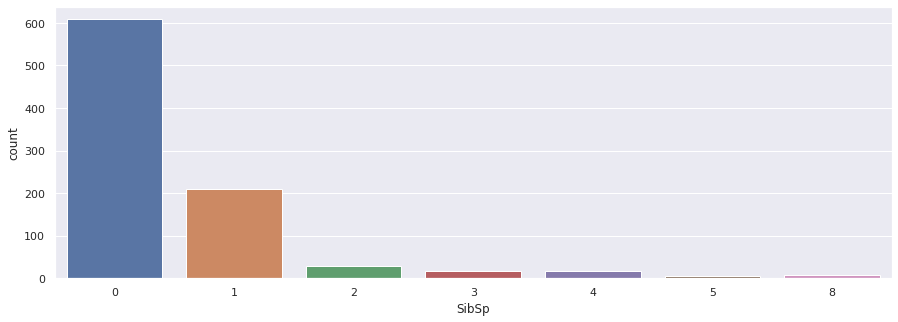

In [66]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x = 'SibSp', data = df1)

The number of siblings present for passengers.

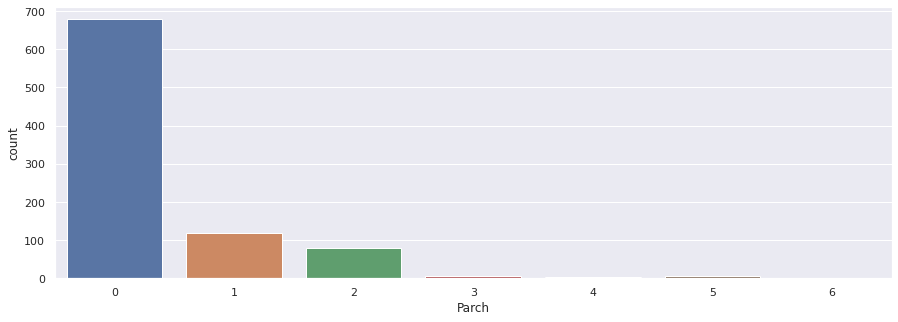

In [67]:
sns.countplot(x = 'Parch', data = df1)

The number of parents and children present.

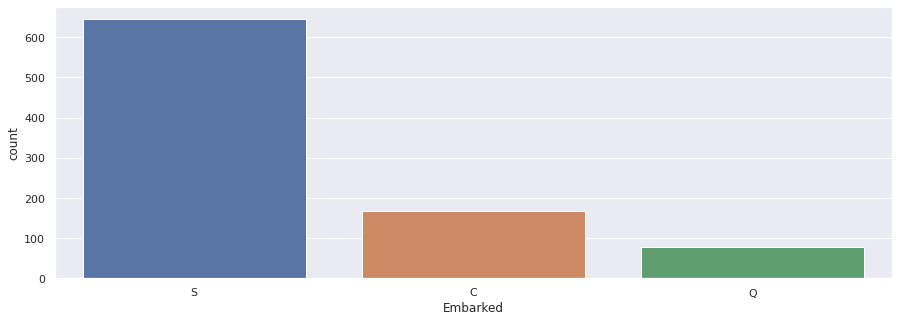

In [68]:
sns.countplot(x = 'Embarked', data = df1)

The places from where the passengers boarded the Titanic.

<h2> Bivariate Data Analysis </h2>

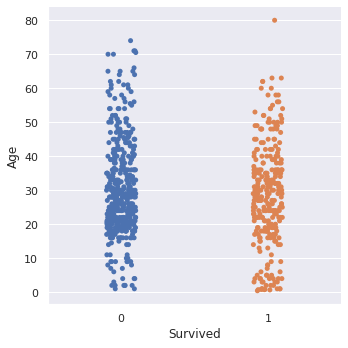

In [69]:
sns.catplot(x ='Survived', y ='Age', data = df1)

This shows that more number of young people survived the crash of Titanic.

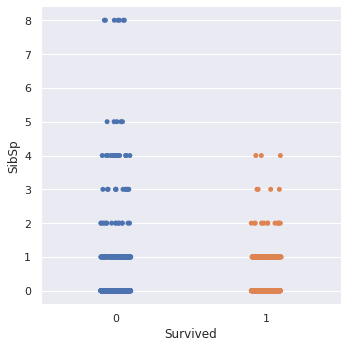

In [70]:
sns.catplot(x ='Survived', y ='SibSp', data = df1)

The number of passengers survived on the basis of the siblings the passengers had on Titanic.

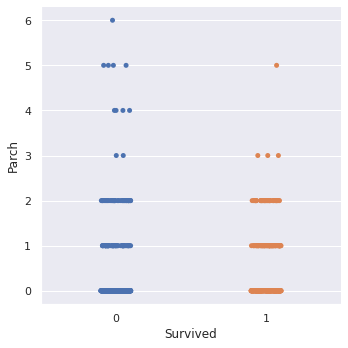

In [71]:
sns.catplot(x ='Survived', y ='Parch', data = df1)

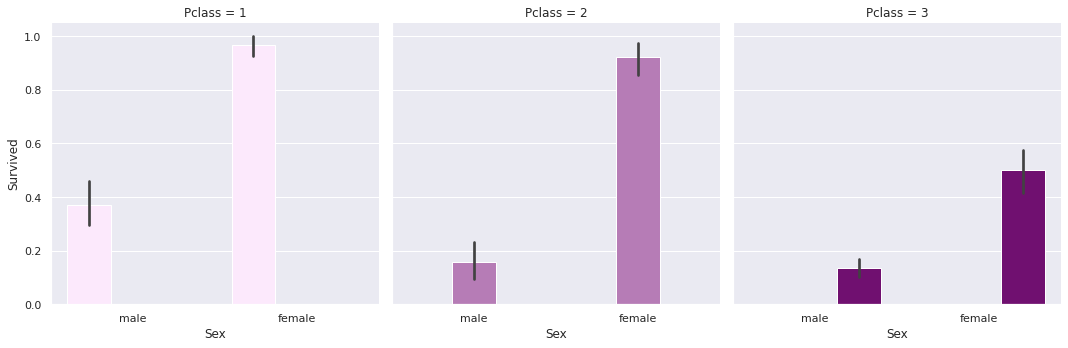

In [72]:
sns.catplot(x = 'Sex',y='Survived',hue = 'Pclass', kind = 'bar', data = df1, col = 'Pclass', color = 'purple')

The line at the top shows the mean of the values and their standard deviation around the part.
This shows how many passengers survived according to the class they belonged to and their gender.
Females and Males of class 1 survived more.
Females of all classes survived more.

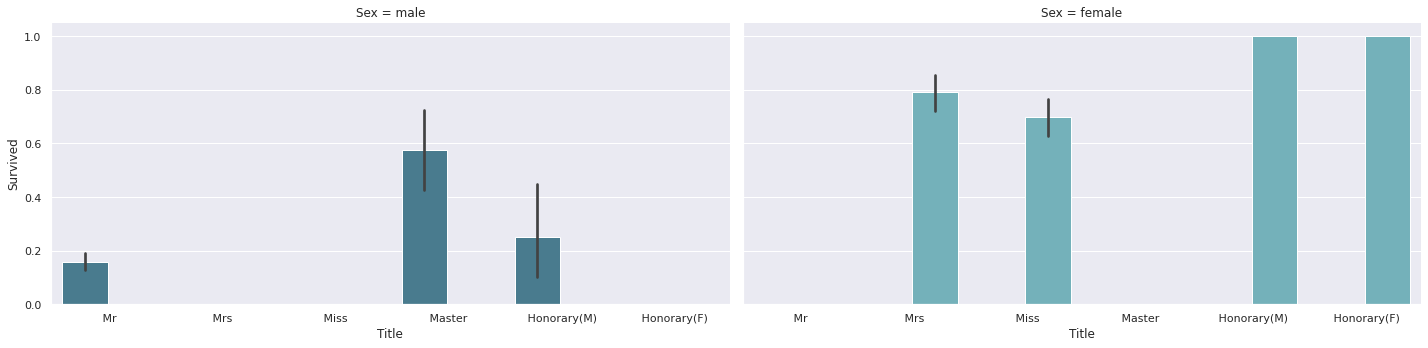

In [73]:
sns.catplot(x = 'Title',y='Survived',hue = 'Sex', kind = 'bar', data = df3, col = 'Sex', palette = 'GnBu_d',aspect =2)

Females survived more and those with honorary titles survived more in their respective percantage.

<h2>Explanation of Violin Plot</h2>

![Violin Plot](https://images.ctfassets.net/fi0zmnwlsnja/sdfgtcRp16wTNOcRceGQm/5bfcb73d2261d49ff20dd7857e0152b1/Screen_Shot_2019-03-01_at_11.36.10_AM.png)

Violin plots have many of the same summary statistics as box plots:

* the white dot represents the median
* the thick gray bar in the center represents the interquartile range
* the thin gray line represents the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the interquartile range.
* the skinnier the plots, the lower the probability of values lying there.

[For more info, Check -->](https://mode.com/blog/violin-plot-examples/)

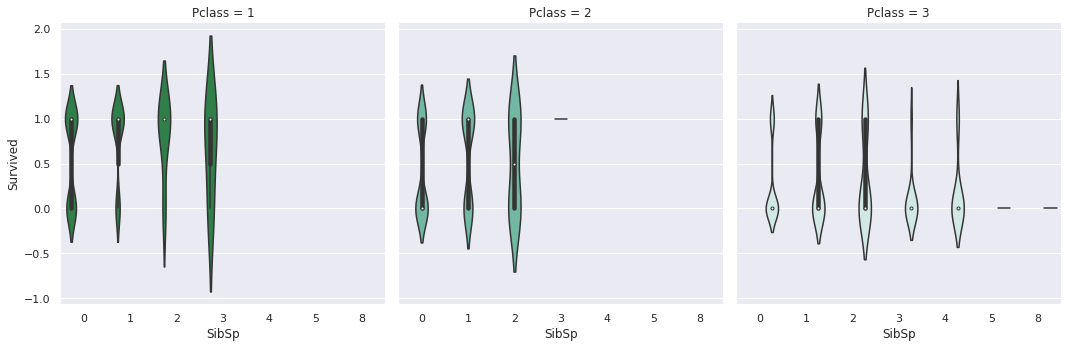

In [74]:
sns.catplot(x = 'SibSp',y='Survived',hue = 'Pclass',kind = 'violin', data = df3, palette = 'BuGn_r', col = 'Pclass')

The siblings of class 1 survived more than Class 2 and Class 1

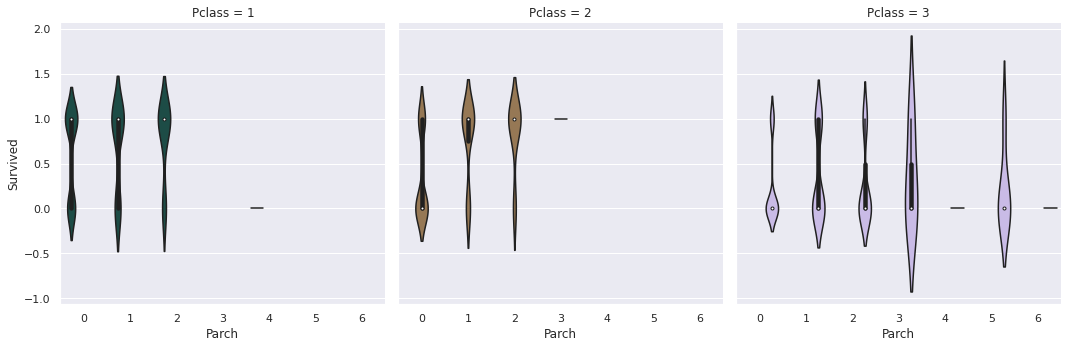

In [75]:
sns.catplot(x = 'Parch',y='Survived',hue = 'Pclass',kind = 'violin', data = df3, palette = 'cubehelix', col = 'Pclass')

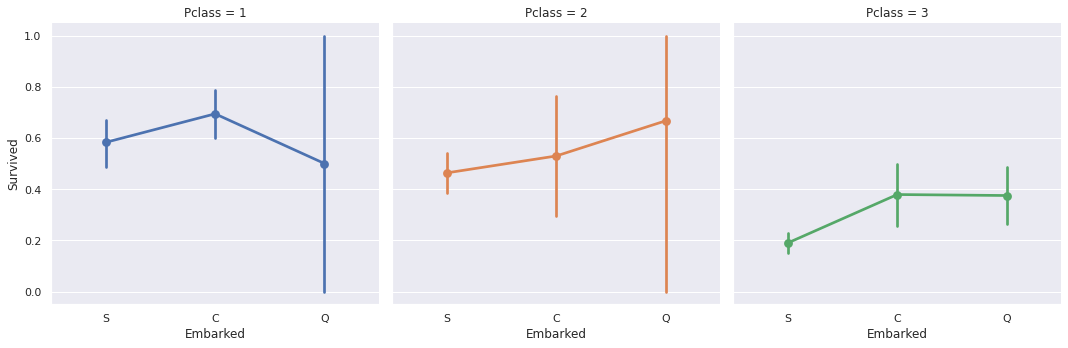

In [76]:
sns.catplot(x = 'Embarked',y='Survived',kind = 'point', data = df3, hue = 'Pclass', col = 'Pclass')

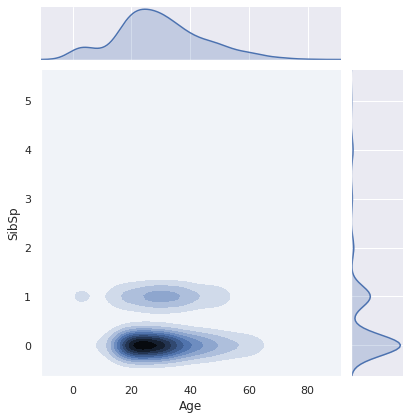

In [77]:
sns.jointplot(x=df1['Age'], y=df1['SibSp'], kind = 'kde')

In [78]:
correlation = final.copy()
sur = pd.concat([df['Survived'],result['Survived']],axis = 0)
correlation = pd.concat([correlation,sur],axis = 1)

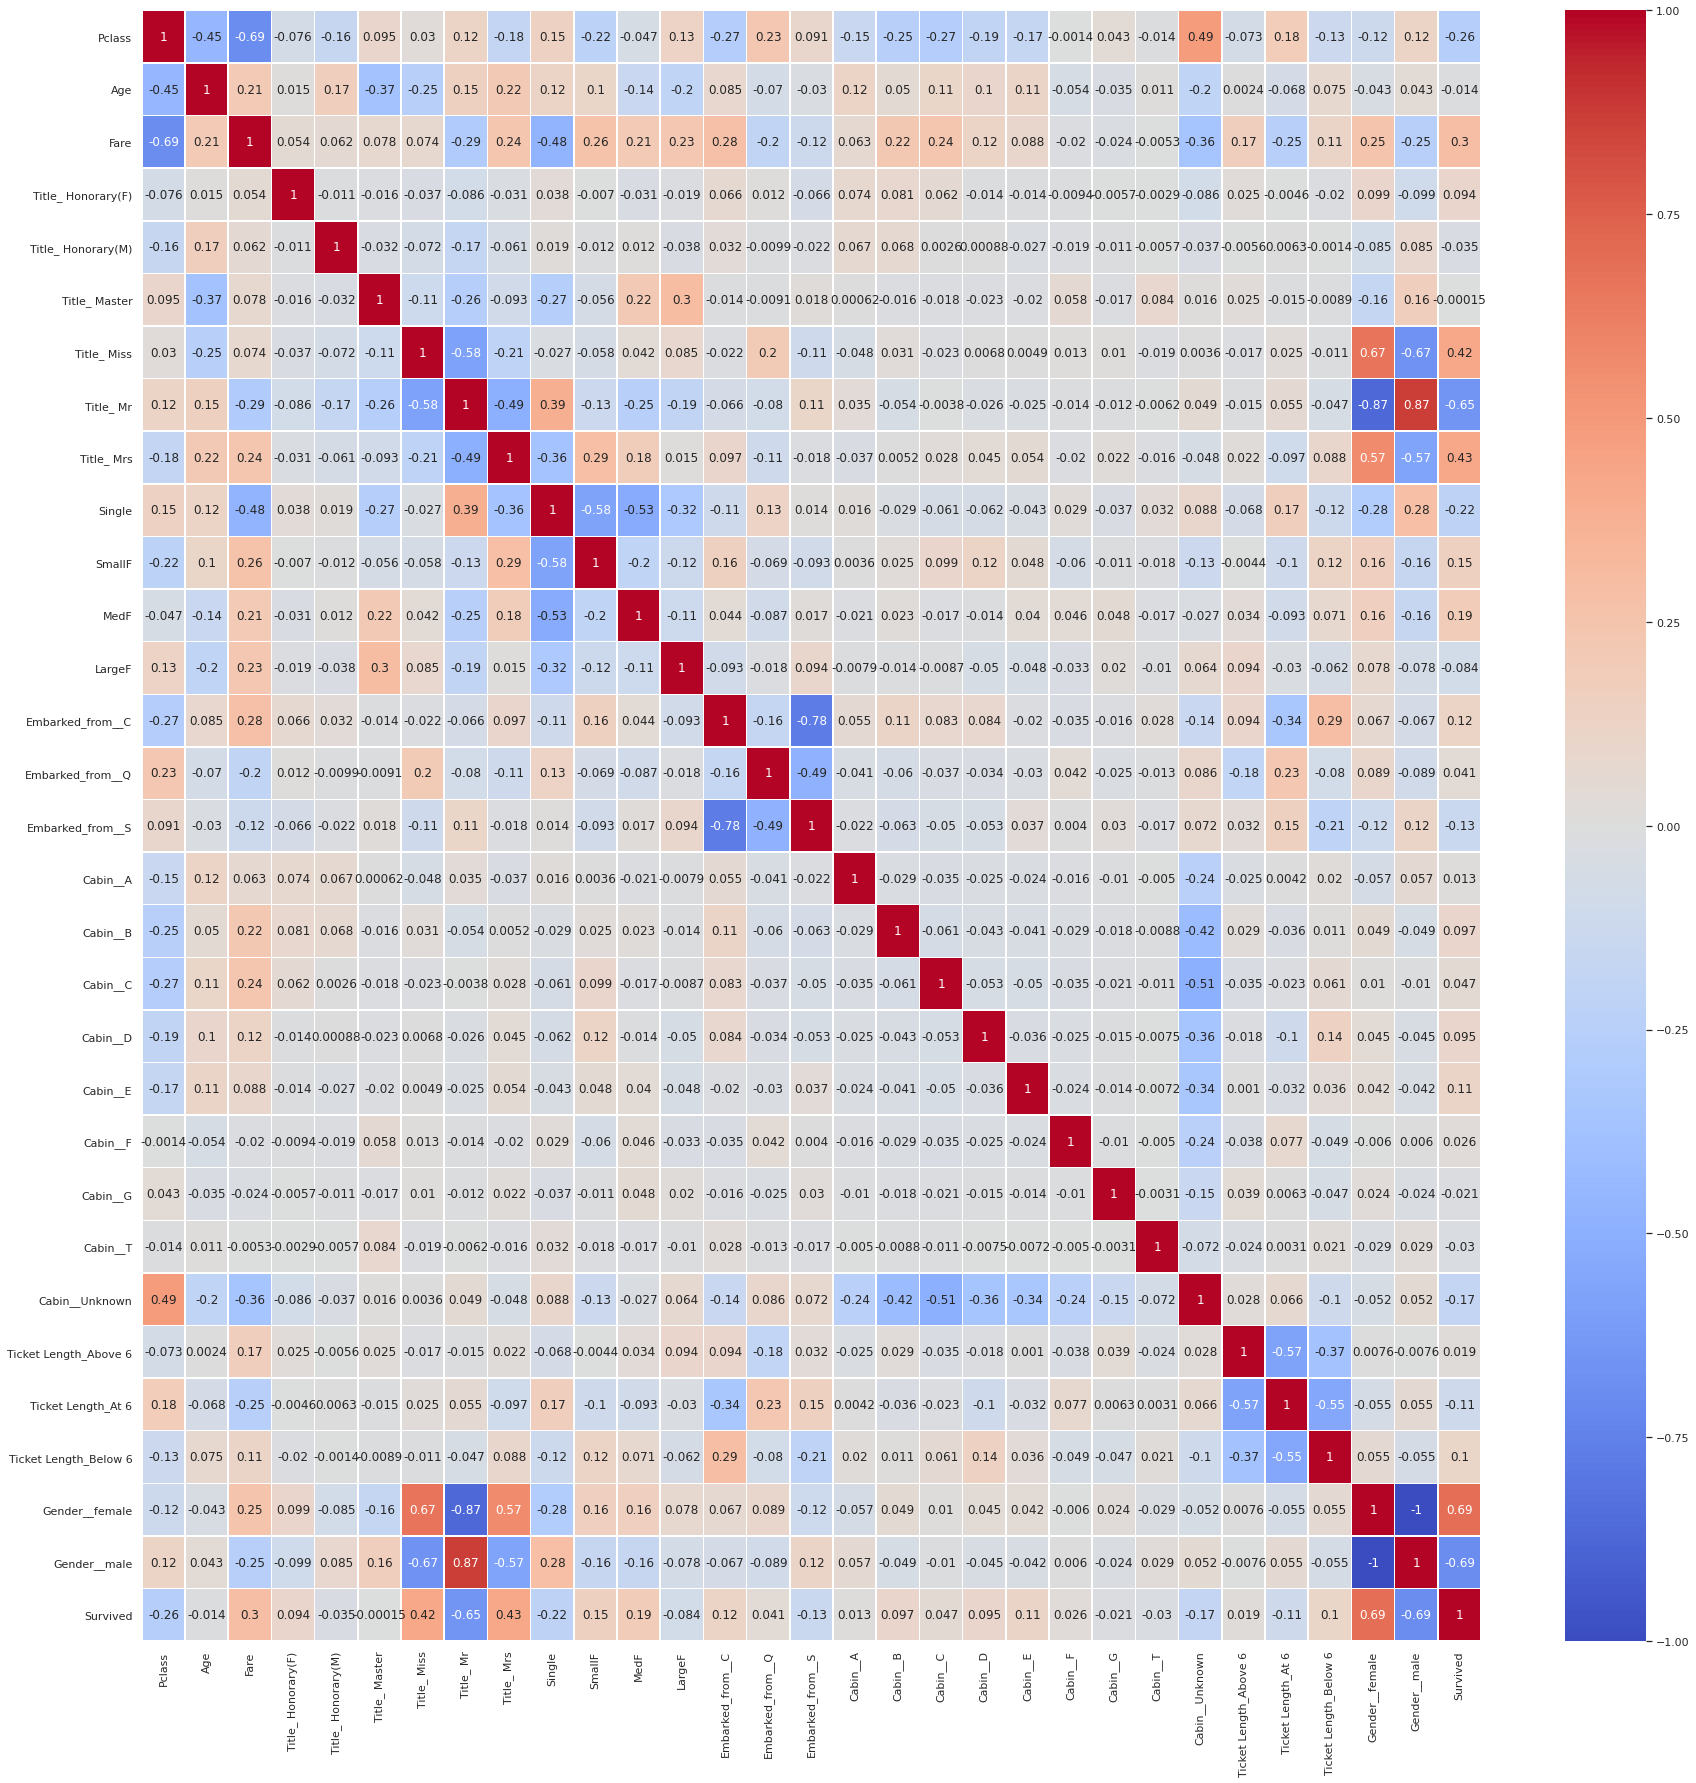

In [79]:
plt.figure(figsize=(30,30))
sns.heatmap(correlation.corr(), annot=True, linewidth=0.5, cmap='coolwarm')

As you can see in the last row, the chances for Survival are highest for higher positive correlation value(Shown in descending order) :
1. Gender - Female (.69)
1. Title - Mrs (.43)
1. Title - Miss (.42)
1. Fare (.3)
1. Medium Family (.19)

As you can see in the last row, the chances for Survival are lowest for lower negative correlation value(Shown in Ascending order) :
1. Gender - Male (-.69)
1. Title - Mr(-.65)
1. Pclass (-.26)
1. Single (Solo traveller) (-.22)
1. Embarked from S (-.13)

# Feature Scaling


In [80]:
#The models trained
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB

#For Scaling and Hyperparameter Tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import metrics

#Voting Classifier
from sklearn.ensemble import VotingClassifier 

In [81]:
x_train = final[:891]
feature_scaler = MinMaxScaler()
x_train = feature_scaler.fit_transform(x_train)

In [82]:
y_train = final[891:]
feature_scaler = MinMaxScaler()
y_train = feature_scaler.fit_transform(y_train)

In [83]:
x_test = df1['Survived']

In [84]:
y_test = result['Survived']

# Model Training

1. Logistic Regression
1. Support Vector Machine
1. Decision Tree
1. Naive Bayes
1. Random Forest
1. Gradient Boosting
1. K-Nearest Neighbor
1. XG Bosst

<h2> Models without Hyperparameter Tuning

In [85]:
accuracy = []
estimator = []

<h3>1.) Logistic Regression</h3>

In [86]:
LR = LogisticRegression()
estimator.append(('LR',LogisticRegression()))
cv = cross_val_score(LR,x_train,x_test,cv=10)
accuracy1 = cv.mean()
accuracy.append(accuracy1)
print(cv)
print(cv.mean())

[0.81111111 0.83146067 0.7752809  0.87640449 0.84269663 0.80898876
 0.82022472 0.80898876 0.88764045 0.83146067]
0.8294257178526842


Submission 1 for Logisitc Regression without Hyperparameter Tuning

In [87]:
LR.fit(x_train,x_test)
model1pred = LR.predict(y_train)
submission1 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission1['PassengerId'] = result['PassengerId']
submission1['Survived'] = model1pred
submission1.to_csv('LogisticRegression(No HT).csv',index = False)

In [88]:
LR.score(y_train,y_test)

0.937799043062201

<h3>2.) Support Vector Machine</h3>

2.a) Support Vector Machine using Linear kernel

In [89]:
SVC = LinearSVC()
#estimator.append(('LSVC',LinearSVC()))
cv = cross_val_score(SVC,x_train,x_test,cv=10)
accuracy2 = cv.mean()
accuracy.append(accuracy2)
print(cv)
print(cv.mean())


[0.8        0.83146067 0.7752809  0.86516854 0.83146067 0.83146067
 0.82022472 0.79775281 0.87640449 0.84269663]
0.8271910112359551


In [90]:
SVC.fit(x_train,x_test)
SVC.score(y_train,y_test)

0.9354066985645934

Submission 2 for SVC without Hyperparameter Optimisation

In [91]:
SVC.fit(x_train,x_test)
model2pred = SVC.predict(y_train)
submission2 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission2['PassengerId'] = result['PassengerId']
submission2['Survived'] = model2pred
submission2.to_csv('LinearSVC(No HT).csv',index = False)

2.b) Support Vector Machine using Polynomial kernel

In [92]:
poly = svm.SVC(kernel = 'poly', gamma = 'scale')
#estimator.append(('PSVC',svm.SVC(kernel = 'poly', gamma = 'scale')))
cv = cross_val_score(poly,x_train,x_test,cv=10)
accuracy3 = cv.mean()
accuracy.append(accuracy3)
print(cv)
print(cv.mean())

[0.78888889 0.86516854 0.7752809  0.84269663 0.86516854 0.80898876
 0.84269663 0.78651685 0.87640449 0.84269663]
0.8294506866416977


In [93]:
poly.fit(x_train,x_test)
poly.score(y_train,y_test)

0.9234449760765551

Submission 3 for SVC without Hyperparameter Optimisation

In [94]:
model3pred = poly.predict(y_train)
submission3 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission3['PassengerId'] = result['PassengerId']
submission3['Survived'] = model3pred
submission3.to_csv('PolynomialSVC(No HT).csv',index = False)

<h3>3.) Decision Tree</h3>

In [95]:
DT = DecisionTreeClassifier(random_state = 5)
estimator.append(('DT',DecisionTreeClassifier(random_state = 5)))
cv = cross_val_score(DT,x_train,x_test,cv=10)
accuracy4 = cv.mean()
accuracy.append(accuracy4)
print(cv)
print(cv.mean())

[0.76666667 0.74157303 0.6741573  0.78651685 0.83146067 0.80898876
 0.78651685 0.76404494 0.78651685 0.83146067]
0.7777902621722845


In [96]:
DT.fit(x_train,x_test)
DT.score(y_train,y_test)

0.7272727272727273

In [97]:
model4pred = DT.predict(y_train)
submission4 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission4['PassengerId'] = result['PassengerId']
submission4['Survived'] = model4pred
submission4.to_csv('Decision Tree(No HT).csv',index = False)

<h3>4.) Naive Bayes</h3>


4.a) Gaussian NB

In [98]:
GNB = GaussianNB()
estimator.append(('GNB',GaussianNB()))
cv = cross_val_score(GNB,x_train,x_test,cv=10)
accuracy5 = cv.mean()
accuracy.append(accuracy5)
print(cv)
print(cv.mean())

[0.72222222 0.7752809  0.7752809  0.7752809  0.82022472 0.7752809
 0.80898876 0.78651685 0.82022472 0.85393258]
0.7913233458177278


In [99]:
GNB.fit(x_train,x_test)
GNB.score(y_train,y_test)

0.8277511961722488

In [100]:
model5pred = GNB.predict(y_train)
submission5 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission5['PassengerId'] = result['PassengerId']
submission5['Survived'] = model5pred
submission5.to_csv('Gaussian NB(No HT).csv',index = False)

4.b) Multinomial NB

In [101]:
MNB = MultinomialNB()
estimator.append(('MNB',MultinomialNB()))
cv = cross_val_score(MNB,x_train,x_test,cv=10)
accuracy6 = cv.mean()
accuracy.append(accuracy6)
print(cv)
print(cv.mean())

[0.8        0.80898876 0.76404494 0.85393258 0.80898876 0.80898876
 0.79775281 0.75280899 0.82022472 0.80898876]
0.8024719101123596


In [102]:
MNB.fit(x_train,x_test)
MNB.score(y_train,y_test)

0.9688995215311005

In [103]:
MNB.fit(x_train,x_test)
model6pred = MNB.predict(y_train)
submission6 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission6['PassengerId'] = result['PassengerId']
submission6['Survived'] = model6pred
submission6.to_csv('MultinomialNB(No HT).csv',index = False)

<h3>5.) Random Forest Classifier</h3>

In [104]:
RF = RandomForestClassifier(random_state = 5)
estimator.append(('RF',RandomForestClassifier(random_state = 5)))
cv = cross_val_score(RF,x_train,x_test,cv=10)
accuracy7 = cv.mean()
accuracy.append(accuracy7)
print(cv)
print(cv.mean())

[0.77777778 0.82022472 0.69662921 0.86516854 0.85393258 0.84269663
 0.76404494 0.71910112 0.83146067 0.80898876]
0.7980024968789013


In [105]:
RF.fit(x_train,x_test)
RF.score(y_train,y_test)

0.8301435406698564

In [106]:
RF.fit(x_train,x_test)
model7pred = RF.predict(y_train)
submission7 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission7['PassengerId'] = result['PassengerId']
submission7['Survived'] = model7pred
submission7.to_csv('RandomForest(No HT).csv',index = False)

<h3>6.) Gradient Boosting Classifier</h3>

In [107]:
GBC = GradientBoostingClassifier(random_state = 5)
estimator.append(('GBC',GradientBoostingClassifier(random_state = 5)))
cv = cross_val_score(GBC,x_train,x_test,cv=10)
accuracy8 = cv.mean()
accuracy.append(accuracy8)
print(cv)
print(cv.mean())

[0.78888889 0.82022472 0.75280899 0.86516854 0.85393258 0.85393258
 0.84269663 0.78651685 0.88764045 0.82022472]
0.8272034956304619


In [108]:
GBC.fit(x_train,x_test)
GBC.score(y_train,y_test)

0.8732057416267942

In [109]:
GBC.fit(x_train,x_test)
model8pred = GBC.predict(y_train)
submission8 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission8['PassengerId'] = result['PassengerId']
submission8['Survived'] = model8pred
submission8.to_csv('GradientBoosting(No HT).csv',index = False)

<h3>7.) XG Boosting</h3>

In [110]:
XGB = XGBClassifier(random_state = 5)
estimator.append(('XGB', XGBClassifier(random_state = 5)))
cv = cross_val_score(XGB,x_train,x_test,cv=10)
accuracy9 = cv.mean()
accuracy.append(accuracy9)
print(cv)
print(cv.mean())

[0.73333333 0.7752809  0.73033708 0.8988764  0.85393258 0.86516854
 0.83146067 0.7752809  0.86516854 0.82022472]
0.8149063670411986


In [111]:
XGB.fit(x_train,x_test)
XGB.score(y_train,y_test)

0.7990430622009569

In [112]:
XGB.fit(x_train,x_test)
model9pred = XGB.predict(y_train)
submission9 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission9['PassengerId'] = result['PassengerId']
submission9['Survived'] = model9pred
submission9.to_csv('XGBoosting(No HT).csv',index = False)

<h3>8.) K-Nearest Neigbhbors</h3>

Text(0, 0.5, 'Accuracy')

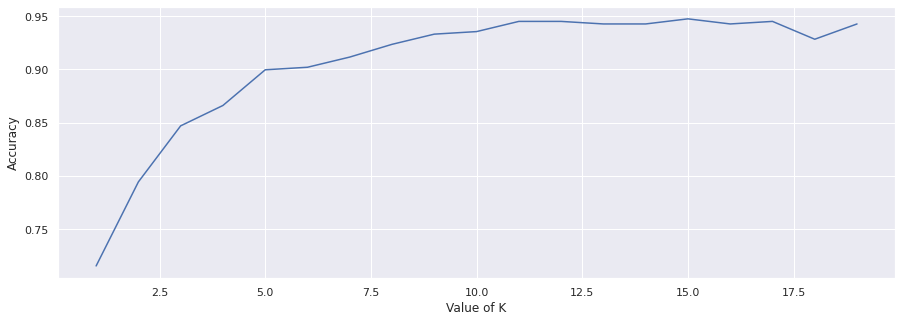

In [113]:
Krange = range(1,20)
scores = {}
scores_list = []
for k in Krange:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,x_test)
    y_pred = knn.predict(y_train)
    scores[k] = metrics.accuracy_score(result['Survived'],y_pred)
    scores_list.append(metrics.accuracy_score(result['Survived'],y_pred))
    
plt.plot(Krange,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [114]:
KNN = KNeighborsClassifier(n_neighbors = 11)
estimator.append(('KNN',KNeighborsClassifier(n_neighbors = 11)))
cv = cross_val_score(KNN,x_train,x_test,cv=10)
accuracy10 = cv.mean()
accuracy.append(accuracy10)
print(cv)
print(cv.mean())

[0.77777778 0.82022472 0.7752809  0.87640449 0.88764045 0.79775281
 0.78651685 0.79775281 0.86516854 0.86516854]
0.8249687890137327


In [115]:
KNN.fit(x_train,x_test)
KNN.score(y_train,y_test)

0.9449760765550239

In [116]:
KNN.fit(x_train,x_test)
model10pred = KNN.predict(y_train)
submission10 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission10['PassengerId'] = result['PassengerId']
submission10['Survived'] = model10pred
submission10.to_csv('KNN(No HT).csv',index = False)

In [117]:
Models = ['Logistic Regression','Linear SVM','Polynomial SVM','Decision Tree','Gaussian NB','Multinomial NB','Random Forest Classifier','Gradient Boost Classifier','XG Boosting','K-Nearest Neighbors']
total = list(zip(Models,accuracy))
output1 = pd.DataFrame(total, columns = ['Models','Accuracy'])


In [118]:
o = output1.groupby(['Models'])['Accuracy'].mean().reset_index().sort_values(by='Accuracy',ascending=False)
o.head(10).style.background_gradient(cmap='Reds')


,Models,Accuracy
7,Polynomial SVM,0.829451
5,Logistic Regression,0.829426
2,Gradient Boost Classifier,0.827203
4,Linear SVM,0.827191
3,K-Nearest Neighbors,0.824969
9,XG Boosting,0.814906
6,Multinomial NB,0.802472
8,Random Forest Classifier,0.798002
1,Gaussian NB,0.791323
0,Decision Tree,0.777790


In [119]:
vot_soft = VotingClassifier(estimators = estimator, voting ='soft') 
vot_soft.fit(x_train, x_test) 
y_pred = vot_soft.predict(y_train)
vot_soft.score(y_train,y_test)

0.9066985645933014

In [120]:
modelpred1 = vot_soft.predict(y_train)
sub1 = pd.DataFrame(columns = ['PassengerId','Survived'])
sub1['PassengerId'] = result['PassengerId']
sub1['Survived'] = modelpred1
sub1.to_csv('SoftVoting(NO HT).csv',index = False)

In [121]:
vot_hard = VotingClassifier(estimators = estimator, voting ='hard') 
vot_hard.fit(x_train, x_test) 
y_pred = vot_hard.predict(y_train)
vot_hard.score(y_train,y_test)

0.9090909090909091

In [122]:
modelpred2 = vot_hard.predict(y_train)
sub2 = pd.DataFrame(columns = ['PassengerId','Survived'])
sub2['PassengerId'] = result['PassengerId']
sub2['Survived'] = modelpred2
sub2.to_csv('HardVoting(NO HT).csv',index = False)

# Models after Hyperparameter Optimisation

In [123]:
Accuracy = []
Estimator = []

<h3>1.) Logistic Regression</h3>

In [124]:
"""
C = [0.01,0.1, 1, 10,50, 100]
penalty = ['l2']
solver = ['newton-cg','lbfgs','liblinear']
class_weight = ['dict','balanced','None']
max_iter = [900,1000,1100,1200]

Log = LogisticRegression()

parameters = {'C': [0.01,0.1, 1, 10,50, 100],'penalty' : ['l2'],'solver' : ['newton-cg','lbfgs','liblinear'],'class_weight':['dict','balanced','None'],'max_iter':[900,1000,1100,1200]}

log_regressor = GridSearchCV(Log, parameters, scoring='accuracy',cv =10)
log_regressor.fit(x_train, x_test)
log_regressor.best_params_
"""

"\nC = [0.01,0.1, 1, 10,50, 100]\npenalty = ['l2']\nsolver = ['newton-cg','lbfgs','liblinear']\nclass_weight = ['dict','balanced','None']\nmax_iter = [900,1000,1100,1200]\n\nLog = LogisticRegression()\n\nparameters = {'C': [0.01,0.1, 1, 10,50, 100],'penalty' : ['l2'],'solver' : ['newton-cg','lbfgs','liblinear'],'class_weight':['dict','balanced','None'],'max_iter':[900,1000,1100,1200]}\n\nlog_regressor = GridSearchCV(Log, parameters, scoring='accuracy',cv =10)\nlog_regressor.fit(x_train, x_test)\nlog_regressor.best_params_\n"

In [125]:
#log_regressor.best_score_

In [126]:
lr = LogisticRegression(C = 100,penalty = 'l2', solver = 'newton-cg',class_weight = 'dict', max_iter = 900)
Estimator.append(('lr',LogisticRegression(C = 1,penalty = 'l2', solver = 'newton-cg',class_weight = 'dict', max_iter = 900)))
cv = cross_val_score(lr,x_train,x_test,cv=10)
Accuracy1 = cv.mean()
Accuracy.append(Accuracy1)
print(cv)
print(cv.mean())

[0.8        0.83146067 0.7752809  0.88764045 0.82022472 0.79775281
 0.83146067 0.79775281 0.88764045 0.83146067]
0.8260674157303372


In [127]:
lr.fit(x_train,x_test)
lr.score(y_train,y_test)

0.9234449760765551

In [128]:
model11pred = lr.predict(y_train)
submission11 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission11['PassengerId'] = result['PassengerId']
submission11['Survived'] = model11pred
submission11.to_csv('LogisticRegression(HT).csv',index = False)

<h3>2.) Support Vector Machine </h3>

2.a) Linear SVC

In [129]:
'''
penalty = ['l1','l2']
loss = ['hinge','squared_hinge']
class_weight = ['dict','balanced','None']
C = [.1,1,10,50,100,150]

SVM = LinearSVC()

parameters = {'penalty':['l1','l2'],'loss':['hinge','squared_hinge'],'class_weight':['dict','balanced','None'] ,'C': [.1,1,10,50,100,150]}

SVM_classifier = GridSearchCV(SVM, parameters, scoring='accuracy' ,cv =10)
SVM_classifier.fit(x_train, x_test)
SVM_classifier.best_params_
'''

"\npenalty = ['l1','l2']\nloss = ['hinge','squared_hinge']\nclass_weight = ['dict','balanced','None']\nC = [.1,1,10,50,100,150]\n\nSVM = LinearSVC()\n\nparameters = {'penalty':['l1','l2'],'loss':['hinge','squared_hinge'],'class_weight':['dict','balanced','None'] ,'C': [.1,1,10,50,100,150]}\n\nSVM_classifier = GridSearchCV(SVM, parameters, scoring='accuracy' ,cv =10)\nSVM_classifier.fit(x_train, x_test)\nSVM_classifier.best_params_\n"

In [130]:
#SVM_classifier.best_score_

In [131]:
svc = LinearSVC(C = 0.1,penalty = 'l2', loss = 'hinge',class_weight = 'balanced')
cv = cross_val_score(svc,x_train,x_test,cv=10)
Accuracy2 = cv.mean()
Accuracy.append(Accuracy2)
print(cv)
print(cv.mean())

[0.83333333 0.86516854 0.7752809  0.84269663 0.83146067 0.79775281
 0.82022472 0.78651685 0.84269663 0.85393258]
0.8249063670411985


In [132]:
svc.fit(x_train,x_test)
svc.score(y_train,y_test)

0.9449760765550239

In [133]:
model12pred = svc.predict(y_train)
submission12 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission12['PassengerId'] = result['PassengerId']
submission12['Survived'] = model12pred
submission12.to_csv('SVCLinear(HT).csv',index = False)

2.b) Other SVM's

In [134]:
'''
kernel = ['poly']
degree = [1,2,3]
class_weight = ['balanced','dict']
C = [.1,1,10,]
gamma = ['scale','auto']

s = svm.SVC()

parameters = {'kernel':['poly'],'class_weight':['balanced','dict'] ,'C': [.1,1,10],'degree':[1,2,3],'gamma':['scale','auto']}

svcc = GridSearchCV(s, parameters, scoring='accuracy' ,cv =10)
svcc.fit(x_train, x_test)
svcc.best_params_
'''

"\nkernel = ['poly']\ndegree = [1,2,3]\nclass_weight = ['balanced','dict']\nC = [.1,1,10,]\ngamma = ['scale','auto']\n\ns = svm.SVC()\n\nparameters = {'kernel':['poly'],'class_weight':['balanced','dict'] ,'C': [.1,1,10],'degree':[1,2,3],'gamma':['scale','auto']}\n\nsvcc = GridSearchCV(s, parameters, scoring='accuracy' ,cv =10)\nsvcc.fit(x_train, x_test)\nsvcc.best_params_\n"

In [135]:
#svcc.best_score_

In [136]:
SVM_all = svm.SVC(C = 1,degree = 2, kernel = 'poly',class_weight = 'balanced',gamma = 'scale')
cv = cross_val_score(svc,x_train,x_test,cv=10)
Accuracy3 = cv.mean()
Accuracy.append(Accuracy3)
print(cv)
print(cv.mean())

[0.83333333 0.86516854 0.7752809  0.84269663 0.83146067 0.79775281
 0.82022472 0.78651685 0.84269663 0.85393258]
0.8249063670411985


In [137]:
SVM_all.fit(x_train,x_test)
SVM_all.score(y_train,y_test)

0.8899521531100478

In [138]:
model13pred = SVM_all.predict(y_train)
submission13 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission13['PassengerId'] = result['PassengerId']
submission13['Survived'] = model13pred
submission13.to_csv('PolynomialSVM(HT).csv',index = False)

<h3>3.) Decision Trees</h3>

In [139]:
'''
criterion = ['gini','entropy']
splitter = ['best','random']
max_depth = [5,10,15,20,25]
min_samples_split = [2,3,4,5]
class_weight = ['dict','balanced','None']
random_state = [5,6]


Tree = DecisionTreeClassifier()

parameters = {'criterion': ['gini','entropy'],'splitter': ['best','random'], 'max_depth':[5,10,15,20,25],'min_samples_split':[2,3,4,5],'class_weight':['dict','balanced','None'],'random_state':[5,6]}

tree_classifier = GridSearchCV(Tree, parameters, scoring='accuracy' ,cv = 10)
tree_classifier.fit(x_train, x_test)
tree_classifier.best_params_
'''

"\ncriterion = ['gini','entropy']\nsplitter = ['best','random']\nmax_depth = [5,10,15,20,25]\nmin_samples_split = [2,3,4,5]\nclass_weight = ['dict','balanced','None']\nrandom_state = [5,6]\n\n\nTree = DecisionTreeClassifier()\n\nparameters = {'criterion': ['gini','entropy'],'splitter': ['best','random'], 'max_depth':[5,10,15,20,25],'min_samples_split':[2,3,4,5],'class_weight':['dict','balanced','None'],'random_state':[5,6]}\n\ntree_classifier = GridSearchCV(Tree, parameters, scoring='accuracy' ,cv = 10)\ntree_classifier.fit(x_train, x_test)\ntree_classifier.best_params_\n"

In [140]:
#tree_classifier.best_score_


In [141]:
dt = DecisionTreeClassifier(class_weight = 'balanced',criterion = 'entropy',max_depth = 5,min_samples_split = 2,splitter = 'best',random_state = 6)
Estimator.append(('dt',DecisionTreeClassifier(class_weight = 'balanced',criterion = 'entropy',max_depth = 5,min_samples_split = 2,splitter = 'best',random_state = 6)))
cv = cross_val_score(dt,x_train,x_test,cv=10)
Accuracy4 = cv.mean()
Accuracy.append(Accuracy4)
print(cv)
print(cv.mean())

[0.8        0.84269663 0.75280899 0.87640449 0.80898876 0.7752809
 0.84269663 0.83146067 0.85393258 0.84269663]
0.8226966292134831


In [142]:
dt.fit(x_train,x_test)
dt.score(y_train,y_test)

0.8086124401913876

In [143]:
model14pred = SVM_all.predict(y_train)
submission14 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission14['PassengerId'] = result['PassengerId']
submission14['Survived'] = model14pred
submission14.to_csv('DecisionTrees(HT).csv',index = False)

<h3>4.) Naive Bayes</h3>

In [144]:
'''
alpha = [0.01,0.1, 1, 10, 100]
fit_prior = [True,False]

mnb = MultinomialNB()

parameters = {'alpha': [0.01,0.1, 1, 10, 100],'fit_prior' : [True,False]}

mn = GridSearchCV(mnb, parameters, scoring='accuracy',cv =10)
mn.fit(x_train, x_test)
mn.best_params_
'''

"\nalpha = [0.01,0.1, 1, 10, 100]\nfit_prior = [True,False]\n\nmnb = MultinomialNB()\n\nparameters = {'alpha': [0.01,0.1, 1, 10, 100],'fit_prior' : [True,False]}\n\nmn = GridSearchCV(mnb, parameters, scoring='accuracy',cv =10)\nmn.fit(x_train, x_test)\nmn.best_params_\n"

In [145]:
#mn.best_score_

In [146]:
mnb = MultinomialNB(alpha = 1,fit_prior = True)
Estimator.append(('mnb',MultinomialNB(alpha = 1,fit_prior = True)))
cv = cross_val_score(mnb,x_train,x_test,cv=10)
Accuracy5 = cv.mean()
Accuracy.append(Accuracy5)
print(cv)
print(cv.mean())

[0.8        0.80898876 0.76404494 0.85393258 0.80898876 0.80898876
 0.79775281 0.75280899 0.82022472 0.80898876]
0.8024719101123596


In [147]:
mnb.fit(x_train,x_test)
mnb.score(y_train,y_test)

0.9688995215311005

In [148]:
model15pred = mnb.predict(y_train)
submission15 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission15['PassengerId'] = result['PassengerId']
submission15['Survived'] = model15pred
submission15.to_csv('MultinomialNB(HT).csv',index = False)

<h3>5.) Random Forest Classifier </h3>

In [149]:
'''
n_estimators = [250,500,750,1000]
criterion = ['gini','entropy']
max_depth = [5,10,15,20,25]
min_samples_split = [2,3,4,5]
bootstrap = [True,False]
oob_score = [True,False]
class_weight = ['balanced','balanced_subsample','dict']
max_features = ['auto','sqrt','log2']

RF = RandomForestClassifier()

parameters = {'n_estimators': [250,500,750,1000],'criterion': ['gini','entropy'],'max_depth':[5,10,15,20,25],'min_samples_split':[2,3,4,5],'bootstrap':[True,False]
              ,'oob_score':[True,False],'class_weight':['balanced','balanced_subsample','dict'],'max_features':['auto','sqrt','log2']}

RFClassifier = RandomizedSearchCV(RF, parameters, scoring='accuracy' ,cv =50)
RFClassifier.fit(x_train, x_test)
RFClassifier.best_params_
'''

"\nn_estimators = [250,500,750,1000]\ncriterion = ['gini','entropy']\nmax_depth = [5,10,15,20,25]\nmin_samples_split = [2,3,4,5]\nbootstrap = [True,False]\noob_score = [True,False]\nclass_weight = ['balanced','balanced_subsample','dict']\nmax_features = ['auto','sqrt','log2']\n\nRF = RandomForestClassifier()\n\nparameters = {'n_estimators': [250,500,750,1000],'criterion': ['gini','entropy'],'max_depth':[5,10,15,20,25],'min_samples_split':[2,3,4,5],'bootstrap':[True,False]\n              ,'oob_score':[True,False],'class_weight':['balanced','balanced_subsample','dict'],'max_features':['auto','sqrt','log2']}\n\nRFClassifier = RandomizedSearchCV(RF, parameters, scoring='accuracy' ,cv =50)\nRFClassifier.fit(x_train, x_test)\nRFClassifier.best_params_\n"

In [150]:
#RFClassifier.best_score_

In [151]:
"""
n_estimators = [650,700,750,800,850]
criterion = ['gini']
max_depth = [4,5]
min_samples_split = [5,6]
bootstrap = [False,True]
oob_score = [False,True]
class_weight = ['balanced_subsample']
max_features = ['log2']

rF = RandomForestClassifier()

parameters = {'n_estimators': [650,700,750,800,850],'criterion': ['gini'],'max_depth':[5,6],'min_samples_split':[4,5],'bootstrap':[False,True]
              ,'oob_score':[False,True],'class_weight':['balanced_subsample'],'max_features':['log2']}

RClassifier = GridSearchCV(rF, parameters, scoring='accuracy' ,cv =5)
RClassifier.fit(x_train,x_test)
RClassifier.best_params_
"""

"\nn_estimators = [650,700,750,800,850]\ncriterion = ['gini']\nmax_depth = [4,5]\nmin_samples_split = [5,6]\nbootstrap = [False,True]\noob_score = [False,True]\nclass_weight = ['balanced_subsample']\nmax_features = ['log2']\n\nrF = RandomForestClassifier()\n\nparameters = {'n_estimators': [650,700,750,800,850],'criterion': ['gini'],'max_depth':[5,6],'min_samples_split':[4,5],'bootstrap':[False,True]\n              ,'oob_score':[False,True],'class_weight':['balanced_subsample'],'max_features':['log2']}\n\nRClassifier = GridSearchCV(rF, parameters, scoring='accuracy' ,cv =5)\nRClassifier.fit(x_train,x_test)\nRClassifier.best_params_\n"

In [152]:
#RClassifier.best_score_

In [153]:
rf = RandomForestClassifier(oob_score = True,n_estimators =650 ,min_samples_split = 4,max_features = 'log2',max_depth =6,criterion = 'gini',class_weight = 'balanced_subsample',bootstrap = True)
Estimator.append(('rf',RandomForestClassifier(oob_score = True,n_estimators =650 ,min_samples_split = 4,max_features = 'log2',max_depth =6,criterion = 'gini',class_weight = 'balanced_subsample',bootstrap = True)))
cv = cross_val_score(rf,x_train,x_test,cv=10)
Accuracy6 = cv.mean()
Accuracy.append(Accuracy6)
print(cv)
print(cv.mean())

[0.8        0.84269663 0.76404494 0.86516854 0.85393258 0.82022472
 0.80898876 0.7752809  0.85393258 0.85393258]
0.8238202247191012


In [154]:
rf.fit(x_train,x_test)
rf.score(y_train,y_test)

0.9401913875598086

In [155]:
model16pred = rf.predict(y_train)
submission16 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission16['PassengerId'] = result['PassengerId']
submission16['Survived'] = model16pred
submission16.to_csv('RandomForest(HT).csv',index = False)

<h3>6.) Gradient Boosting Classifier </h3>

In [156]:
'''
n_estimators = [250,500,750,1000]
learning_rate = [.01,.1,1,5]
subsample = [.01,.1,1,5]
min_samples_split = [2,3,4,5]
max_depth = [5,10,15,20,25]
loss = ['deviance','exponential']
max_features = ['auto','sqrt','log2']

GB = GradientBoostingClassifier()

parameters = {'n_estimators': [250,500,750,1000],'loss': ['deviance','exponential'],'max_features':['auto','sqrt','log2'],'learning_rate':[.01,.1,1,5],'subsample':[.01,.1,1,5],
             'min_samples_split':[2,3,4,5],'max_depth':[5,10,15,20,25]}

GBClassifier = RandomizedSearchCV(GB, parameters, scoring='accuracy' ,cv =50)
GBClassifier.fit(x_train, x_test)
GBClassifier.best_params_
'''

"\nn_estimators = [250,500,750,1000]\nlearning_rate = [.01,.1,1,5]\nsubsample = [.01,.1,1,5]\nmin_samples_split = [2,3,4,5]\nmax_depth = [5,10,15,20,25]\nloss = ['deviance','exponential']\nmax_features = ['auto','sqrt','log2']\n\nGB = GradientBoostingClassifier()\n\nparameters = {'n_estimators': [250,500,750,1000],'loss': ['deviance','exponential'],'max_features':['auto','sqrt','log2'],'learning_rate':[.01,.1,1,5],'subsample':[.01,.1,1,5],\n             'min_samples_split':[2,3,4,5],'max_depth':[5,10,15,20,25]}\n\nGBClassifier = RandomizedSearchCV(GB, parameters, scoring='accuracy' ,cv =50)\nGBClassifier.fit(x_train, x_test)\nGBClassifier.best_params_\n"

In [157]:
#GBClassifier.best_score_

In [158]:
'''
n_estimators = [150,200,250,300,350]
learning_rate = [.01,.1]
subsample = [.05,.1]
min_samples_split = [3,4,5]
max_depth = [9,10,11]
loss = ['exponential']
max_features = ['auto']

GB = GradientBoostingClassifier()

parameters = {'n_estimators': [150,200,250,300,350],'loss': ['exponential'],'max_features':['auto'],'learning_rate':[.01,.1],'subsample':[.05,.1],
             'min_samples_split':[3,4,5],'max_depth':[9,10,11]}

GBClassifier = GridSearchCV(GB, parameters, scoring='accuracy' ,cv =5)
GBClassifier.fit(x_train, x_test)
GBClassifier.best_params_
'''

"\nn_estimators = [150,200,250,300,350]\nlearning_rate = [.01,.1]\nsubsample = [.05,.1]\nmin_samples_split = [3,4,5]\nmax_depth = [9,10,11]\nloss = ['exponential']\nmax_features = ['auto']\n\nGB = GradientBoostingClassifier()\n\nparameters = {'n_estimators': [150,200,250,300,350],'loss': ['exponential'],'max_features':['auto'],'learning_rate':[.01,.1],'subsample':[.05,.1],\n             'min_samples_split':[3,4,5],'max_depth':[9,10,11]}\n\nGBClassifier = GridSearchCV(GB, parameters, scoring='accuracy' ,cv =5)\nGBClassifier.fit(x_train, x_test)\nGBClassifier.best_params_\n"

In [159]:
#GBClassifier.best_score_

In [160]:
gbc = GradientBoostingClassifier(loss = 'exponential',n_estimators =200 ,min_samples_split = 4,max_features = 'auto',max_depth =9,learning_rate = .01,subsample = .1)
Estimator.append(('gbc',GradientBoostingClassifier(loss = 'exponential',n_estimators =200 ,min_samples_split = 4,max_features = 'auto',max_depth =9,learning_rate = .01,subsample = .1)))
cv = cross_val_score(gbc,x_train,x_test,cv=10)
Accuracy7 = cv.mean()
Accuracy.append(Accuracy7)
print(cv)


print(cv.mean())

[0.81111111 0.80898876 0.7752809  0.88764045 0.87640449 0.79775281
 0.80898876 0.78651685 0.85393258 0.80898876]
0.8215605493133582


In [161]:
gbc.fit(x_train,x_test)
gbc.score(y_train,y_test)

0.9138755980861244

In [162]:
model17pred = gbc.predict(y_train)
submission17 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission17['PassengerId'] = result['PassengerId']
submission17['Survived'] = model17pred
submission17.to_csv('GradientBoosting(HT).csv',index = False)

<h3>7.) XG Boosting</h3>

In [163]:
'''
min_child_weight = [1,5,10]
gamma = [.5,1,1.5,2,2.5]
subsample = [.6,.8,1]
colsample_bytree = [.6,.8,1]
eta = [.01,.05,.1,.5,.2]
max_depth = [3,4,5,6,7,8,9,10]

XB = XGBClassifier()

parameters = {'min_child_weight': [1,5,10],'gamma': [.5,1,1.5,2,2.5],'subsample':[.6,.8,1],'colsample_bytree':[.6,.8,1],'subsample':[.6,.8,1],
             'eta':[.01,.05,.1,.5,.2],'max_depth':[3,4,5,6,7,8,9,10]}

XBClassifier = RandomizedSearchCV(XB, parameters, scoring='accuracy' ,cv =50)
XBClassifier.fit(x_train, x_test)
XBClassifier.best_params_
'''

"\nmin_child_weight = [1,5,10]\ngamma = [.5,1,1.5,2,2.5]\nsubsample = [.6,.8,1]\ncolsample_bytree = [.6,.8,1]\neta = [.01,.05,.1,.5,.2]\nmax_depth = [3,4,5,6,7,8,9,10]\n\nXB = XGBClassifier()\n\nparameters = {'min_child_weight': [1,5,10],'gamma': [.5,1,1.5,2,2.5],'subsample':[.6,.8,1],'colsample_bytree':[.6,.8,1],'subsample':[.6,.8,1],\n             'eta':[.01,.05,.1,.5,.2],'max_depth':[3,4,5,6,7,8,9,10]}\n\nXBClassifier = RandomizedSearchCV(XB, parameters, scoring='accuracy' ,cv =50)\nXBClassifier.fit(x_train, x_test)\nXBClassifier.best_params_\n"

In [164]:
#XBClassifier.best_score_

In [165]:
'''
min_child_weight = [4,5,6]
gamma = [1,1.5,2.0,2.5,3]
subsample = [.6,.8,1,1.2]
colsample_bytree = [.6,.8,1,1.2]
eta = [.5,.01]

max_depth = [5,6,7,8]

XB = XGBClassifier()

parameters = {'min_child_weight': [4,5,6],'gamma': [1,1.5,2.0,2.5,3],'subsample':[.6,.8,1,1.2],'colsample_bytree':[.6,.8,1,1.2],
             'eta':[.5,.01],'max_depth':[5,6,7,8]}

XBClassifier = GridSearchCV(XB, parameters, scoring='accuracy' ,cv =5)
XBClassifier.fit(x_train, x_test)
XBClassifier.best_params_
'''

"\nmin_child_weight = [4,5,6]\ngamma = [1,1.5,2.0,2.5,3]\nsubsample = [.6,.8,1,1.2]\ncolsample_bytree = [.6,.8,1,1.2]\neta = [.5,.01]\n\nmax_depth = [5,6,7,8]\n\nXB = XGBClassifier()\n\nparameters = {'min_child_weight': [4,5,6],'gamma': [1,1.5,2.0,2.5,3],'subsample':[.6,.8,1,1.2],'colsample_bytree':[.6,.8,1,1.2],\n             'eta':[.5,.01],'max_depth':[5,6,7,8]}\n\nXBClassifier = GridSearchCV(XB, parameters, scoring='accuracy' ,cv =5)\nXBClassifier.fit(x_train, x_test)\nXBClassifier.best_params_\n"

In [166]:
#XBClassifier.best_score_

In [167]:
xgb = XGBClassifier(colsample_bytree = .6,eta = 0.5,gamma = 1,max_depth = 5,min_child_weight = 6,subsample = 1)
Estimator.append(('xgb',XGBClassifier(colsample_bytree = .6,eta = 0.5,gamma = 1,max_depth = 5,min_child_weight = 6,subsample = 1)))
cv = cross_val_score(xgb,x_train,x_test,cv=10)
Accuracy8 = cv.mean()
Accuracy.append(Accuracy8)
print(cv)
print(cv.mean())

[0.77777778 0.82022472 0.75280899 0.8988764  0.8988764  0.84269663
 0.85393258 0.82022472 0.87640449 0.82022472]
0.8362047440699125


In [168]:
xgb.fit(x_train,x_test)
gbc.score(y_train,y_test)

0.9138755980861244

In [169]:
model18pred = xgb.predict(y_train)
submission18 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission18['PassengerId'] = result['PassengerId']
submission18['Survived'] = model18pred
submission18.to_csv('XGBoosting(HT).csv',index = False)

<h3>8.) K-Nearest Neighbors</h3>

In [170]:
x_train1 = final[:891]
feature_scaler = StandardScaler()
x_train1 = feature_scaler.fit_transform(x_train1)
y_train1 = final[891:]
feature_scaler = StandardScaler()
y_train1 = feature_scaler.fit_transform(y_train1)

Text(0, 0.5, 'Accuracy')

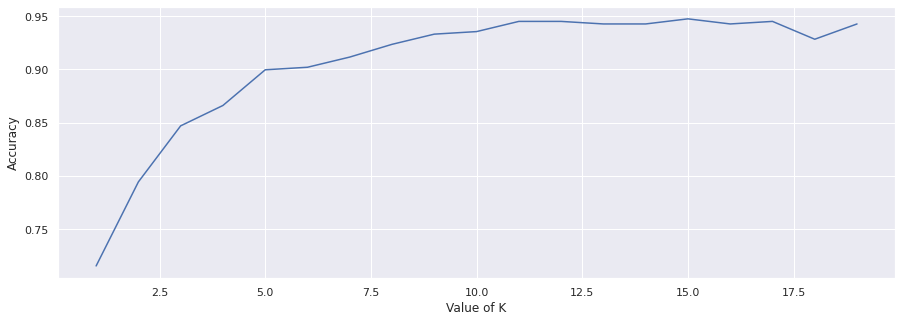

In [171]:
Krange1 = range(1,20)
scores1 = {}
scores_list1 = []
for k in Krange1:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train1,x_test)
    y_pred = knn.predict(y_train1)
    scores1[k] = metrics.accuracy_score(result['Survived'],y_pred)
    scores_list1.append(metrics.accuracy_score(result['Survived'],y_pred))
    
plt.plot(Krange,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [172]:
knn = KNeighborsClassifier(n_neighbors = 11)
Estimator.append(('knn',KNeighborsClassifier(n_neighbors = 13)))
cv = cross_val_score(knn,x_train1,x_test,cv=10)
Accuracy9 = cv.mean()
Accuracy.append(Accuracy9)
print(cv)
print(cv.mean())

[0.75555556 0.84269663 0.79775281 0.83146067 0.86516854 0.78651685
 0.80898876 0.75280899 0.84269663 0.87640449]
0.8160049937578029


In [173]:
knn.fit(x_train1,x_test)
knn.score(y_train1,y_test)

0.8755980861244019

In [174]:
model19pred = knn.predict(y_train)
submission19 = pd.DataFrame(columns = ['PassengerId','Survived'])
submission19['PassengerId'] = result['PassengerId']
submission19['Survived'] = model19pred
submission19.to_csv('KNN(StdScaler).csv',index = False)

In [175]:
models = ['Logistic Regression','SVM Linear Classifier','SVM Polynomial Classifier','Decision Tree','Multinomial NB','Random Forest Classifier','Gradient Boost Classifier','XG Boosting','K-Nearest Neighbors(StdScaler)']
total = list(zip(models,Accuracy))
output2 = pd.DataFrame(total, columns = ['Models after Hyperparameter Tuning','Accuracy after HT'])

In [176]:
r = output2.groupby(['Models after Hyperparameter Tuning'])['Accuracy after HT'].mean().reset_index().sort_values(by='Accuracy after HT',ascending=False)
r.head(10).style.background_gradient(cmap='Reds')


,Models after Hyperparameter Tuning,Accuracy after HT
8,XG Boosting,0.836205
3,Logistic Regression,0.826067
6,SVM Linear Classifier,0.824906
7,SVM Polynomial Classifier,0.824906
5,Random Forest Classifier,0.823820
0,Decision Tree,0.822697
1,Gradient Boost Classifier,0.821561
2,K-Nearest Neighbors(StdScaler),0.816005
4,Multinomial NB,0.802472


In [177]:
vot_soft1 = VotingClassifier(estimators = Estimator, voting ='soft') 
vot_soft1.fit(x_train, x_test) 
y_pred = vot_soft1.predict(y_train)
vot_soft1.score(y_train,y_test)

modelpred3 = vot_soft1.predict(y_train)
sub3 = pd.DataFrame(columns = ['PassengerId','Survived'])
sub3['PassengerId'] = result['PassengerId']
sub3['Survived'] = modelpred3
sub3.to_csv('SoftVoting(HT).csv',index = False)

In [178]:
vot_soft1.fit(x_train, x_test) 
vot_soft1.score(y_train,y_test)

0.9425837320574163

In [179]:
vot_hard1 = VotingClassifier(estimators = Estimator, voting ='hard') 
vot_hard1.fit(x_train, x_test) 
y_pred = vot_hard1.predict(y_train)
vot_hard1.score(y_train,y_test)

modelpred4 = vot_hard1.predict(y_train)
sub4 = pd.DataFrame(columns = ['PassengerId','Survived'])
sub4['PassengerId'] = result['PassengerId']
sub4['Survived'] = modelpred4
sub4.to_csv('HardVoting(HT).csv',index = False)

In [180]:
vot_hard1.fit(x_train, x_test) 
vot_hard1.score(y_train,y_test)

0.9497607655502392

In [181]:
output = pd.concat([output1,output2],axis = 1)
output.sort_values(by=['Accuracy after HT'], inplace=True, ascending=False)
output.head(10)

,Models,Accuracy,Models after Hyperparameter Tuning,Accuracy after HT
7,Gradient Boost Classifier,0.827203,XG Boosting,0.836205
0,Logistic Regression,0.829426,Logistic Regression,0.826067
1,Linear SVM,0.827191,SVM Linear Classifier,0.824906
2,Polynomial SVM,0.829451,SVM Polynomial Classifier,0.824906
5,Multinomial NB,0.802472,Random Forest Classifier,0.823820
3,Decision Tree,0.777790,Decision Tree,0.822697
6,Random Forest Classifier,0.798002,Gradient Boost Classifier,0.821561
8,XG Boosting,0.814906,K-Nearest Neighbors(StdScaler),0.816005
4,Gaussian NB,0.791323,Multinomial NB,0.802472
9,K-Nearest Neighbors,0.824969,NaN,NaN


Edit - I got the highest accuracy as 0.78229 by Linear SVC. I wanted to increase my accuracy so I checked various Kernels by top percentile of the authors in this Titanic Competition. So, I have now taken some key points from another notebook and I am gonna implement it here. I would like to acknowledge Mr. Yassine for his good observations. I am attaching the link to his kernel if anybody wants to look at the kernel. 


Reference - https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling